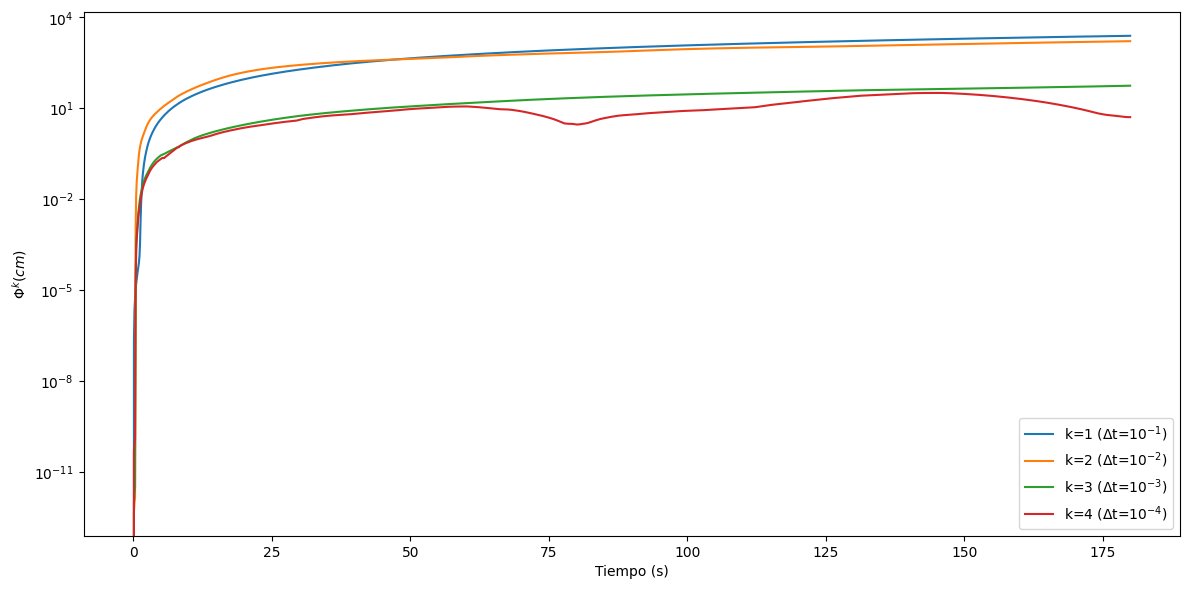

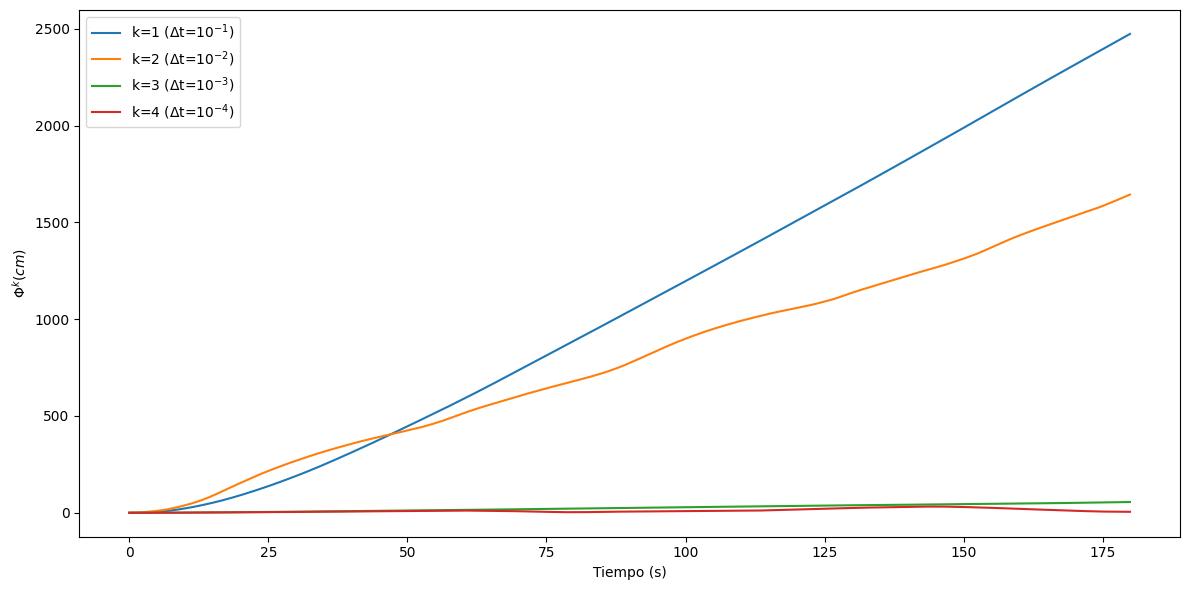

In [7]:
import matplotlib.pyplot as plt
from utils.particlesParser import parsePhiValues
import numpy as np

DTS = [1,2,3,4]  
FILE = '../simulator/src/main/resources/unidimensional_particles/benchmark/phi/phiValues.txt'

phiValues = parsePhiValues(FILE)

plt.figure(figsize=(12, 6))
for key, values in phiValues.items():
    phi_values = [float(value) for value in values['phiValues']]  
    x = np.arange(0.0, 180.0, 0.1)
    plt.plot(x, phi_values, '-', label=f"k={DTS[key]} (Δt=$10^{{-{int(DTS[key])}}}$)")


plt.xlabel('Tiempo (s)')
plt.ylabel('$Φ^k (cm)$')
plt.yscale('log')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
for key, values in phiValues.items():
    phi_values = [float(value) for value in values['phiValues']]  
    x = np.arange(0.0, 180.0, 0.1)
    plt.plot(x, phi_values, '-', label=f"k={DTS[key]} (Δt=$10^{{-{int(DTS[key])}}}$)")


plt.xlabel('Tiempo (s)')
plt.ylabel('$Φ^k (cm)$')
plt.legend()
plt.tight_layout()
plt.show()

{'velocityValues': ['10.74445364139227200000', '10.74445364139227200000', '10.74445364139227200000', '10.74445364139227200000', '10.74445364139227200000', '10.74445364139227200000', '10.74445364139227200000', '10.74445364139227200000', '10.74445364139227200000', '10.74445364139227200000', '10.74445364139227200000', '10.73037622123139500000', '10.69579272579568400000', '10.69630592597400300000', '10.69649813216703500000', '10.69668957107089600000', '10.69688024574861500000', '10.69707015925098600000', '10.69725931461663200000', '10.69524257779779100000', '10.69543902888807300000', '10.69563469574351100000', '10.69582958149477500000', '10.69250034786141600000', '10.69299971770728200000', '10.69246706274667300000', '10.69267459708067800000', '10.69288129957734300000', '10.69189107795731000000', '10.69210090827066700000', '10.69230990093917500000', '10.69224404032023000000', '10.68921186156926300000', '10.68943239955608400000', '10.68965204493981300000', '10.68987081349683000000', '10.6900

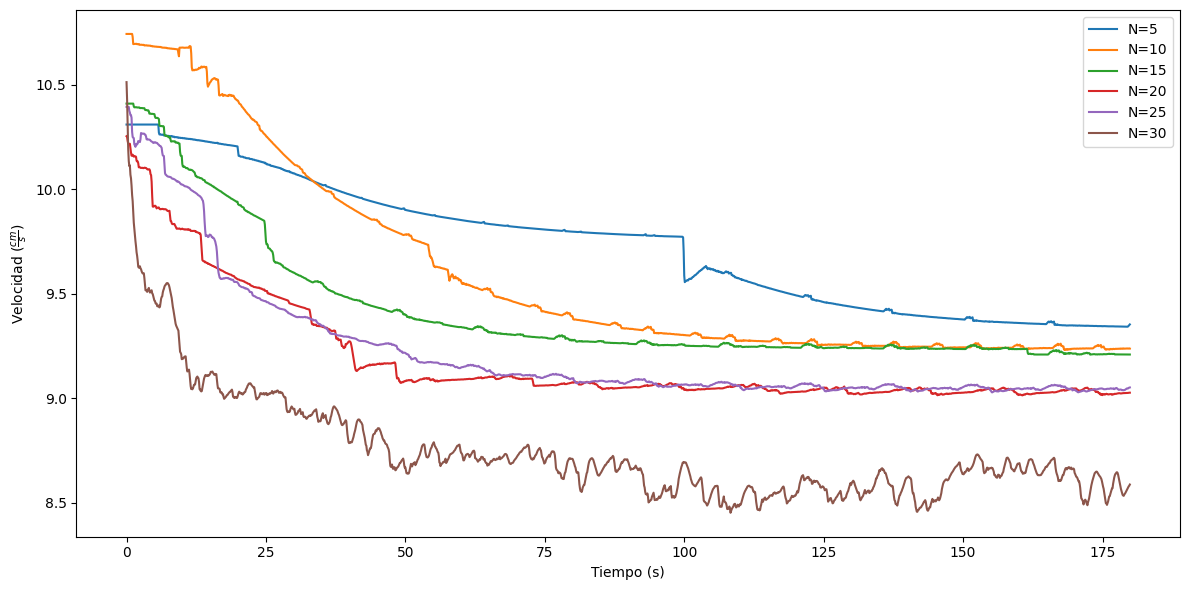

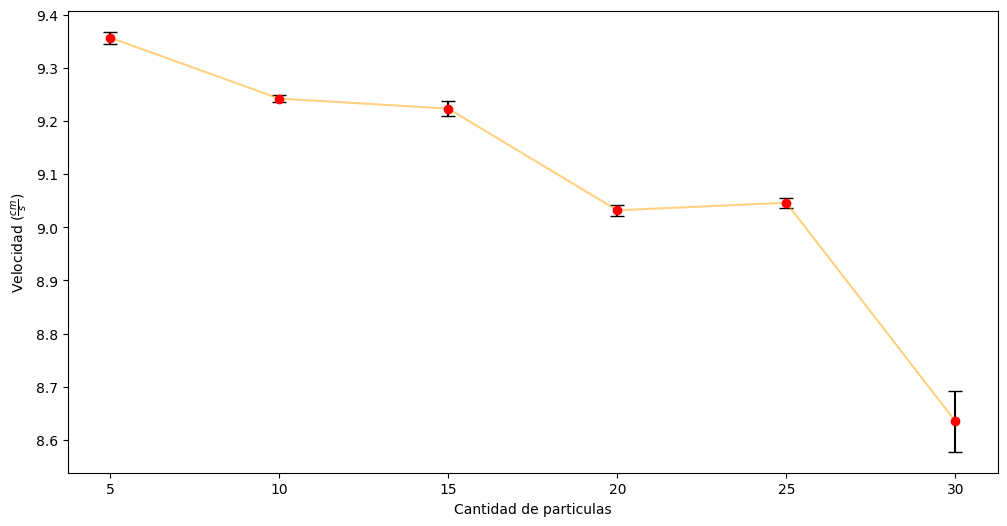

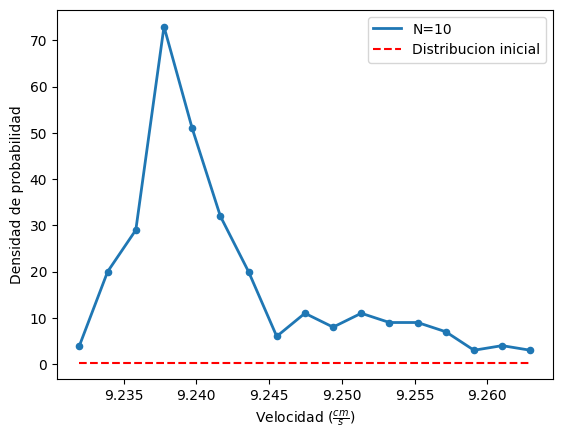

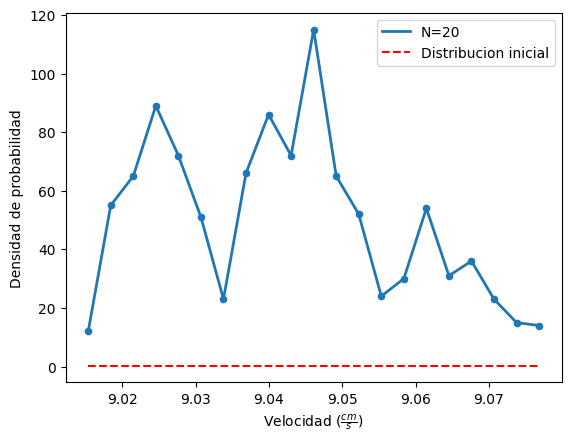

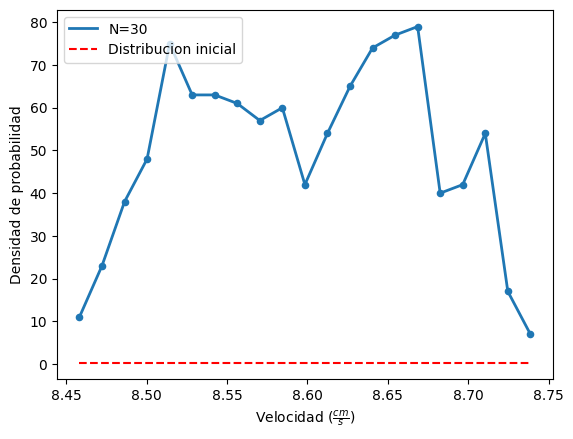

In [18]:
import matplotlib.pyplot as plt
from utils.particlesParser import parseVelocityValues
import numpy as np
import math

Ns = [5,10,15,20,25,30]  
DT = 0.1
x = np.arange(0.0, 180.0, DT)

FILE = '../simulator/src/main/resources/unidimensional_particles/benchmark/velocity/velocityValues.txt'

velocityValues = parseVelocityValues(FILE)

velocityValues = dict(sorted(velocityValues.items()))

print(velocityValues[10])

plt.figure(figsize=(12, 6))
count = 0
for key, values in velocityValues.items():
    velocity_values = [float(value) for value in values['velocityValues']]  
    plt.plot(x, velocity_values, '-', label=f"N={Ns[count]}")
    count += 1

plt.xlabel('Tiempo (s)')
plt.ylabel(r'Velocidad ($\frac{cm}{s}$)')
plt.legend()
plt.tight_layout()
plt.show()

promedios = []
errores = []

count = 0
for key, values in velocityValues.items():
    velocity_values = [float(value) for value in values['velocityValues']][1500:]  
    promedio = np.mean(velocity_values)
    error_estandar = np.std(velocity_values)
    promedios.append(promedio)
    errores.append(error_estandar)

plt.figure(figsize=(12, 6))
plt.errorbar(Ns, promedios, yerr=errores, fmt='o', color='red', capsize=5, ecolor="black")
plt.plot(Ns, promedios, color='orange', alpha=0.5)
plt.ylabel(r'Velocidad ($\frac{cm}{s}$)')
plt.xlabel('Cantidad de particulas')
plt.show()


Ns = [10,20,30]

for key, values in velocityValues.items():
    if key in Ns: 
        if (key == 10):
            stationary = 1500
            velocity_values = [float(value) for value in values['velocityValues']][stationary:]  
        if (key == 20):
            stationary = 750
            velocity_values = [float(value) for value in values['velocityValues']][stationary:]  
        if (key == 30):
            stationary = 750
            velocity_values = [float(value) for value in values['velocityValues']][stationary:]  

        num_particles = len(velocity_values)
        num_bins = int(math.log2(num_particles) * 2) + 1
        p, x = np.histogram(velocity_values, num_bins)

        x = x[:-1] + (x[1] - x[0]) / 2

        """ max_p = np.max(p)
        area_total = np.trapz(p, x)
        p_normalized = p / area_total
        scaling_factor = 1 / np.trapz(p_normalized, x)
        p_normalized = p_normalized * scaling_factor
        print(np.trapz(p_normalized, x)) """
    
        plt.plot(x, p, '-', linewidth=2, label=f"N={key}")
        plt.scatter(x, p, s=20, marker='o')

        x_recta = np.linspace(np.min(x), np.max(x), 100) 
        y_recta = np.full_like(x_recta, 1/3) 
        plt.plot(x_recta, y_recta, 'r--', label='Distribucion inicial')  

        plt.ylabel('Densidad de probabilidad')
        plt.xlabel('Velocidad ($\\frac{cm}{s})$')

        plt.legend()
        plt.show()


{'velocityValues': ['10.74445364139227200000', '10.74445364139227200000', '10.74445364139227200000', '10.74445364139227200000', '10.74445364139227200000', '10.74445364139227200000', '10.74445364139227200000', '10.74445364139227200000', '10.74445364139227200000', '10.74445364139227200000', '10.74445364139227200000', '10.74445364139227200000', '10.74445364139227200000', '10.74445364139227200000', '10.74445364139227200000', '10.74445364139227200000', '10.74445364139227200000', '10.74445364139227200000', '10.74445364139227200000', '10.74445364139227200000', '10.74445364139227200000', '10.74445364139227200000', '10.74445364139227200000', '10.74445364139227200000', '10.74445364139227200000', '10.74445364139227200000', '10.74445364139227200000', '10.74445364139227200000', '10.74445364139227200000', '10.74445364139227200000', '10.74445364139227200000', '10.74445364139227200000', '10.74445364139227200000', '10.74445364139227200000', '10.74445364139227200000', '10.74445364139227200000', '10.7444

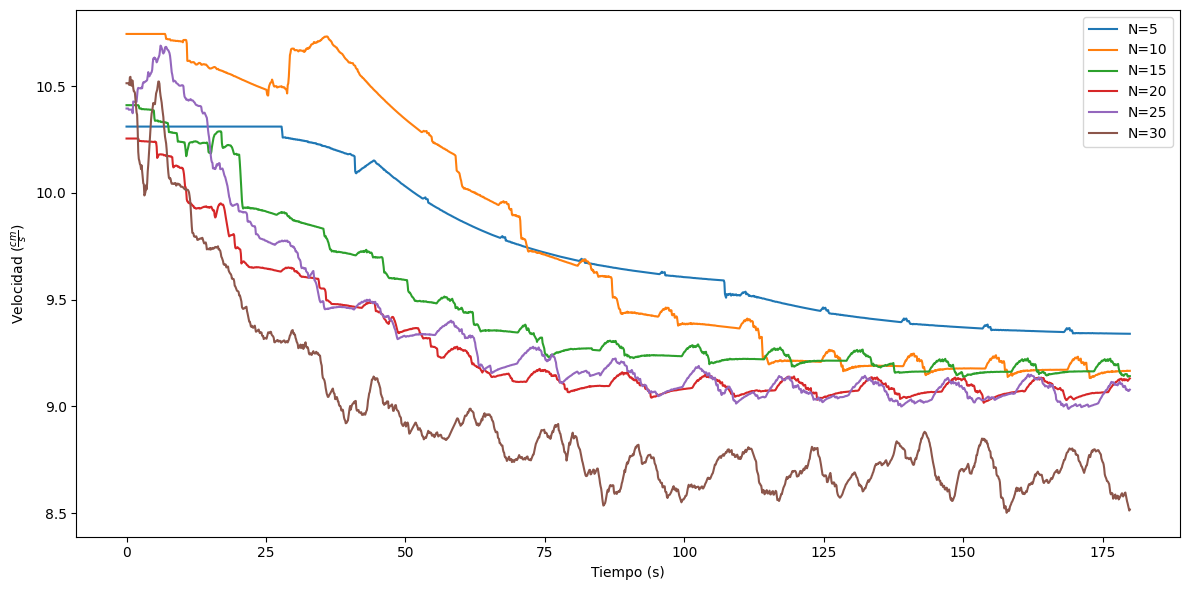

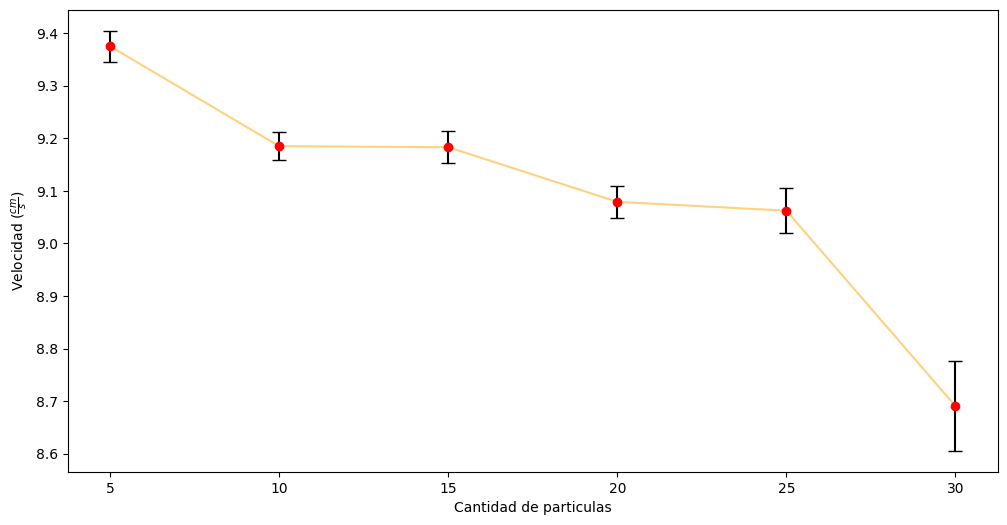

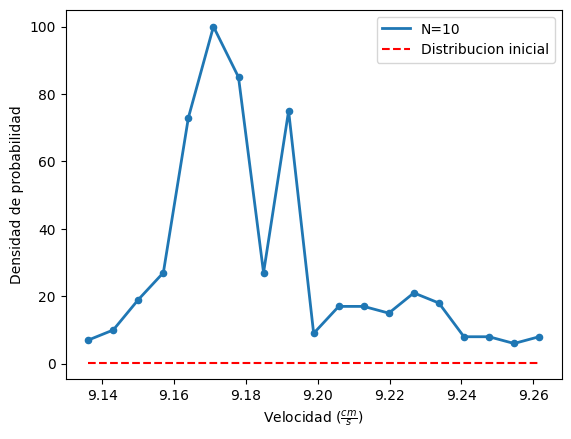

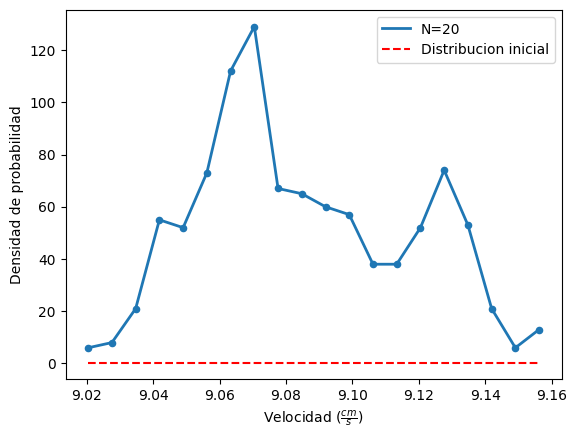

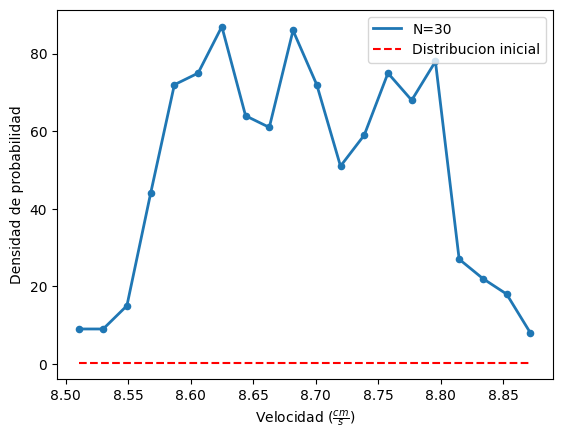

In [25]:
########################################################
#################### ASCENDENTE ##################
########################################################

import matplotlib.pyplot as plt
from utils.particlesParser import parseVelocityValues
import numpy as np
import math

Ns = [5,10,15,20,25,30]  
DT = 0.1
x = np.arange(0.0, 180.0, DT)

FILE = '../simulator/src/main/resources/unidimensional_particles/benchmark/velocity/ascendingOrder/velocityValues.txt'

velocityValues = parseVelocityValues(FILE)

velocityValues = dict(sorted(velocityValues.items()))

print(velocityValues[10])

plt.figure(figsize=(12, 6))
count = 0
for key, values in velocityValues.items():
    velocity_values = [float(value) for value in values['velocityValues']]  
    plt.plot(x, velocity_values, '-', label=f"N={Ns[count]}")
    count += 1

plt.xlabel('Tiempo (s)')
plt.ylabel(r'Velocidad ($\frac{cm}{s}$)')
plt.legend()
plt.tight_layout()
plt.show()

promedios = []
errores = []

count = 0
for key, values in velocityValues.items():
    velocity_values = [float(value) for value in values['velocityValues']][1250:]  
    promedio = np.mean(velocity_values)
    error_estandar = np.std(velocity_values)
    promedios.append(promedio)
    errores.append(error_estandar)

plt.figure(figsize=(12, 6))
plt.errorbar(Ns, promedios, yerr=errores, fmt='o', color='red', capsize=5, ecolor="black")
plt.plot(Ns, promedios, color='orange', alpha=0.5)
plt.ylabel(r'Velocidad ($\frac{cm}{s}$)')
plt.xlabel('Cantidad de particulas')
plt.show()


Ns = [10,20,30]

for key, values in velocityValues.items():
    if key in Ns: 
        if (key == 10):
            stationary = 1250
            velocity_values = [float(value) for value in values['velocityValues']][stationary:]  
        if (key == 20):
            stationary = 800
            velocity_values = [float(value) for value in values['velocityValues']][stationary:]  
        if (key == 30):
            stationary = 800
            velocity_values = [float(value) for value in values['velocityValues']][stationary:]  

        num_particles = len(velocity_values)
        num_bins = int(math.log2(num_particles) * 2) + 1
        p, x = np.histogram(velocity_values, num_bins)

        x = x[:-1] + (x[1] - x[0]) / 2

        """ max_p = np.max(p)
        area_total = np.trapz(p, x)
        p_normalized = p / area_total
        scaling_factor = 1 / np.trapz(p_normalized, x)
        p_normalized = p_normalized * scaling_factor
        print(np.trapz(p_normalized, x)) """
    
        plt.plot(x, p, '-', linewidth=2, label=f"N={key}")
        plt.scatter(x, p, s=20, marker='o')

        x_recta = np.linspace(np.min(x), np.max(x), 100) 
        y_recta = np.full_like(x_recta, 1/3) 
        plt.plot(x_recta, y_recta, 'r--', label='Distribucion inicial')  

        plt.ylabel('Densidad de probabilidad')
        plt.xlabel('Velocidad ($\\frac{cm}{s})$')

        plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
        plt.show()


{'velocityValues': ['10.74445364139227200000', '10.74445364139227200000', '10.74445364139227200000', '10.74445364139227200000', '10.74445364139227200000', '10.74445364139227200000', '10.74445364139227200000', '10.74445364139227200000', '10.74445364139227200000', '10.74445364139227200000', '10.74445364139227200000', '10.74140269894742400000', '10.72158863231986300000', '10.72086094441653200000', '10.72095512671427400000', '10.72104893303527800000', '10.72114236488045200000', '10.72123542374470200000', '10.72132811111697300000', '10.72142042848026900000', '10.72076683561340100000', '10.72086139359448900000', '10.72095557409910700000', '10.72104937863414900000', '10.72114280870048400000', '10.72123586579299800000', '10.72132855140061100000', '10.72070161327907300000', '10.72079643162841200000', '10.72089087146189100000', '10.72098493429054800000', '10.72107862161939300000', '10.72051063949784500000', '10.72060622021655300000', '10.72070141937601500000', '10.72079623849941800000', '10.7208

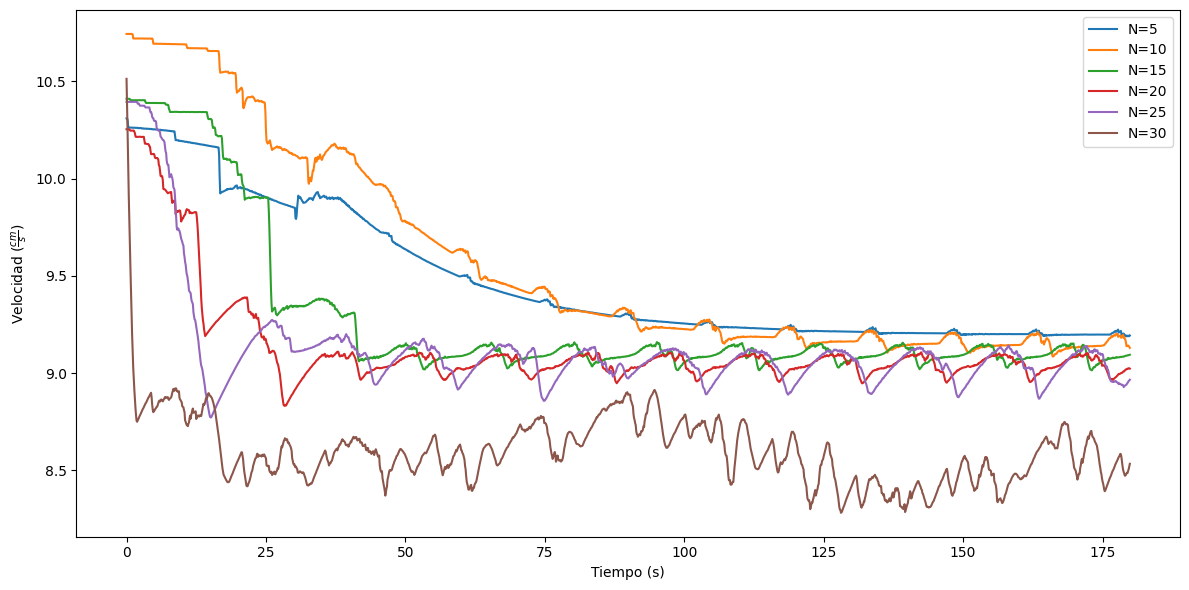

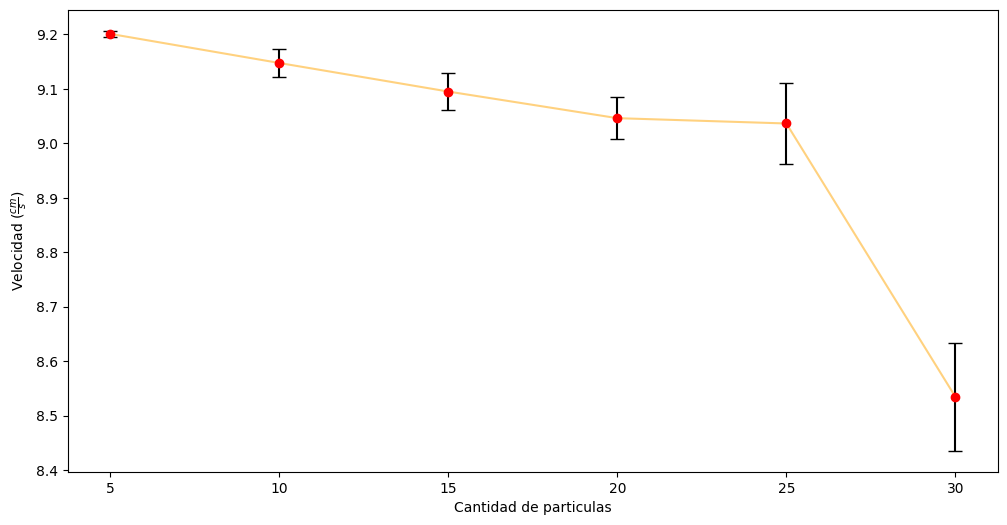

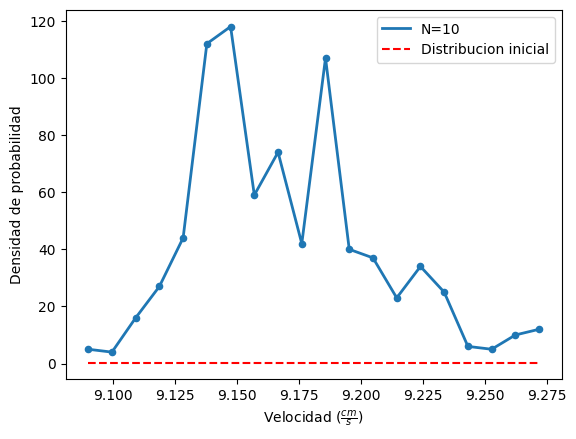

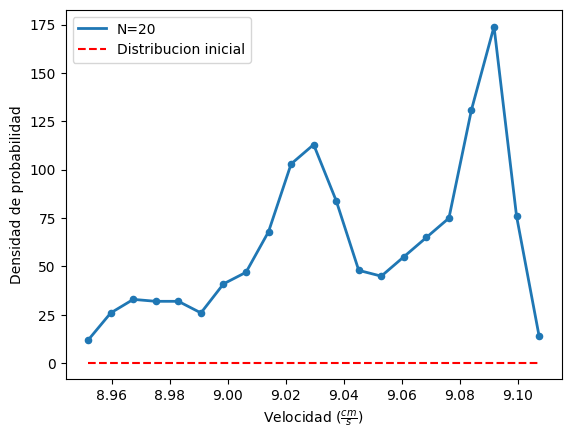

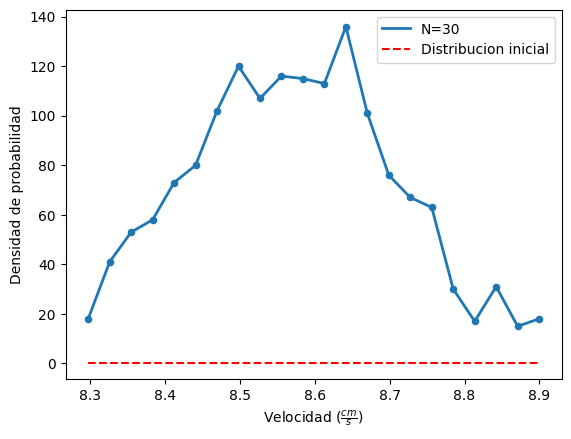

In [23]:
########################################################
#################### DESCENDENTE ##################
########################################################

import matplotlib.pyplot as plt
from utils.particlesParser import parseVelocityValues
import numpy as np
import math

Ns = [5,10,15,20,25,30]  
DT = 0.1
x = np.arange(0.0, 180.0, DT)

FILE = '../simulator/src/main/resources/unidimensional_particles/benchmark/velocity/descendingOrder/velocityValues.txt'

velocityValues = parseVelocityValues(FILE)

velocityValues = dict(sorted(velocityValues.items()))

print(velocityValues[10])

plt.figure(figsize=(12, 6))
count = 0
for key, values in velocityValues.items():
    velocity_values = [float(value) for value in values['velocityValues']]  
    plt.plot(x, velocity_values, '-', label=f"N={Ns[count]}")
    count += 1

plt.xlabel('Tiempo (s)')
plt.ylabel(r'Velocidad ($\frac{cm}{s}$)')
plt.legend()
plt.tight_layout()
plt.show()

promedios = []
errores = []

count = 0
for key, values in velocityValues.items():
    velocity_values = [float(value) for value in values['velocityValues']][1500:]  
    promedio = np.mean(velocity_values)
    error_estandar = np.std(velocity_values)
    promedios.append(promedio)
    errores.append(error_estandar)

plt.figure(figsize=(12, 6))
plt.errorbar(Ns, promedios, yerr=errores, fmt='o', color='red', capsize=5, ecolor="black")
plt.plot(Ns, promedios, color='orange', alpha=0.5)
plt.ylabel(r'Velocidad ($\frac{cm}{s}$)')
plt.xlabel('Cantidad de particulas')
plt.show()


Ns = [10,20,30]

for key, values in velocityValues.items():
    if key in Ns: 
        if (key == 10):
            stationary = 1000
            velocity_values = [float(value) for value in values['velocityValues']][stationary:]  
        if (key == 20):
            stationary = 500
            velocity_values = [float(value) for value in values['velocityValues']][stationary:]  
        if (key == 30):
            stationary = 250
            velocity_values = [float(value) for value in values['velocityValues']][stationary:]  

        num_particles = len(velocity_values)
        num_bins = int(math.log2(num_particles) * 2) + 1
        p, x = np.histogram(velocity_values, num_bins)

        x = x[:-1] + (x[1] - x[0]) / 2

        """ max_p = np.max(p)
        area_total = np.trapz(p, x)
        p_normalized = p / area_total
        scaling_factor = 1 / np.trapz(p_normalized, x)
        p_normalized = p_normalized * scaling_factor
        print(np.trapz(p_normalized, x)) """
    
        plt.plot(x, p, '-', linewidth=2, label=f"N={key}")
        plt.scatter(x, p, s=20, marker='o')

        x_recta = np.linspace(np.min(x), np.max(x), 100) 
        y_recta = np.full_like(x_recta, 1/3) 
        plt.plot(x_recta, y_recta, 'r--', label='Distribucion inicial')  

        plt.ylabel('Densidad de probabilidad')
        plt.xlabel('Velocidad ($\\frac{cm}{s})$')

        plt.legend()
        plt.show()



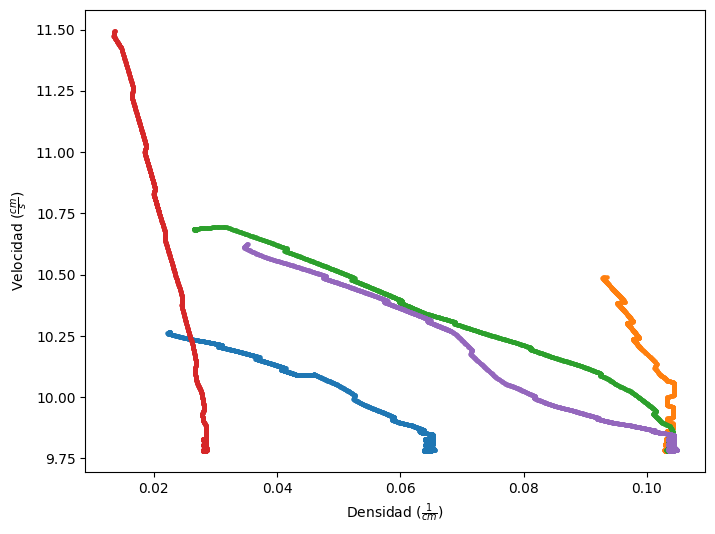

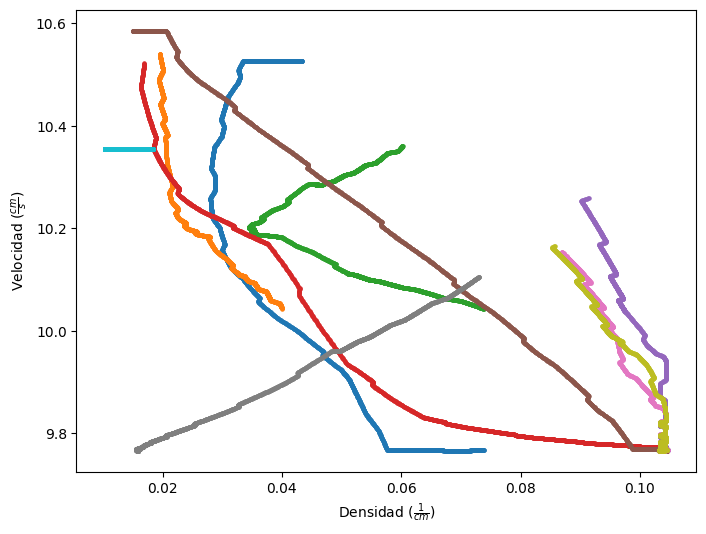

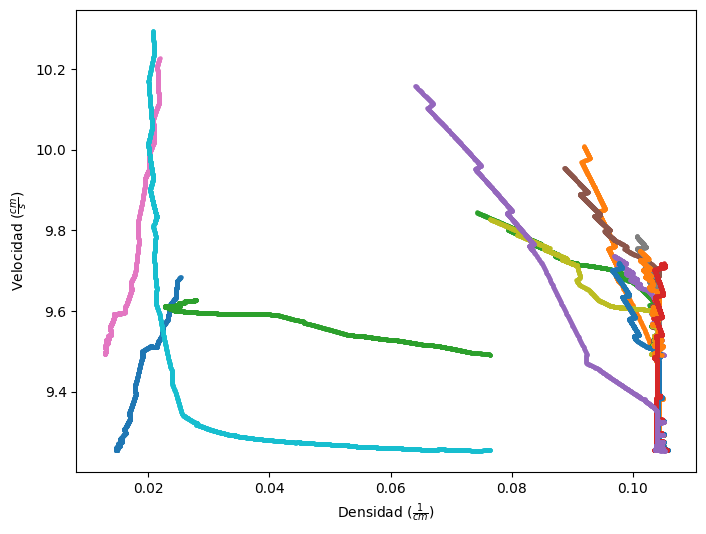

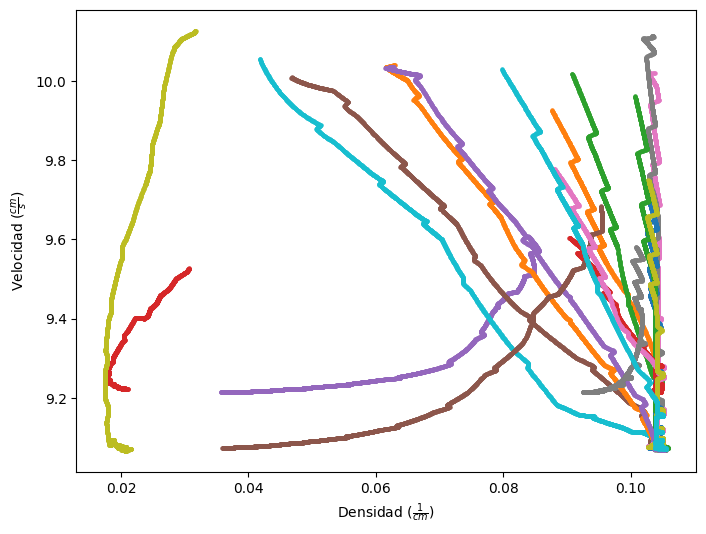

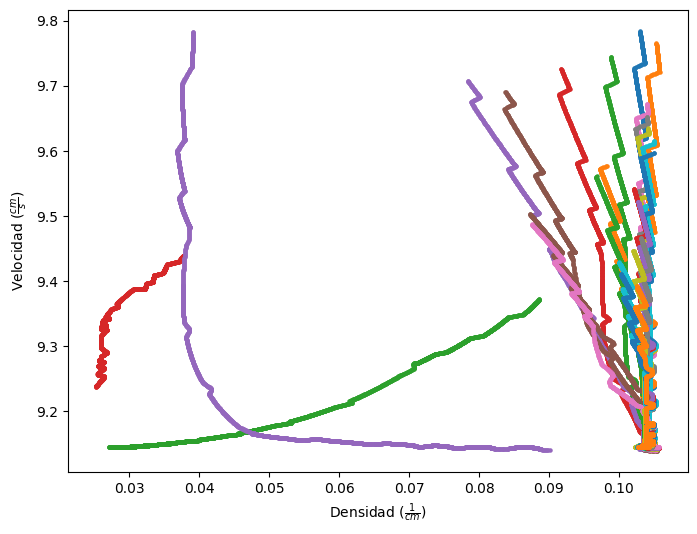

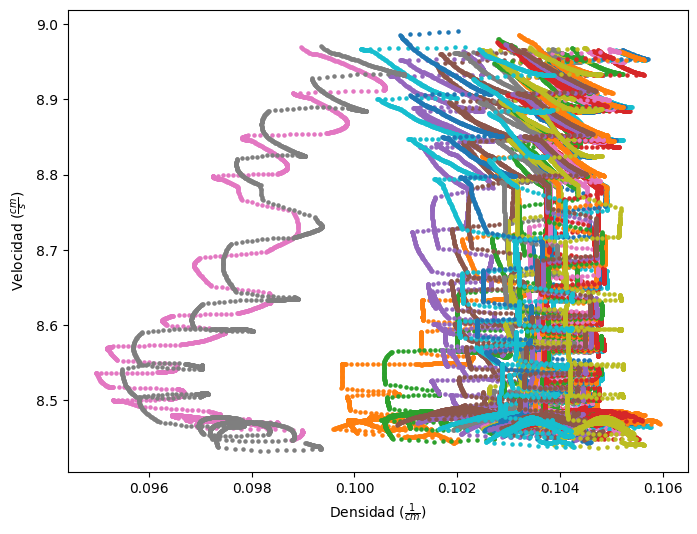

In [6]:
import matplotlib.pyplot as plt

Ns = [5,10,15,20,25,30]

for N in Ns:

    FILE = f'../simulator/src/main/resources/unidimensional_particles/benchmark/density/{N}.txt'

    data = []
    current_particle_id = None
    current_particle_data = []
    # Parsear el archivo de texto
    with open(FILE, 'r') as file:
        lines = file.readlines()
        for line in lines:
            if line.strip().isdigit():
                if current_particle_id is not None:
                    data.append((current_particle_id, current_particle_data))
                current_particle_id = int(line.strip())
                current_particle_data = []
            else:
                values = line.strip().split()
                velocity = float(values[0])
                density = float(values[1])
                current_particle_data.append((velocity, density))
        if current_particle_id is not None:
            data.append((current_particle_id, current_particle_data))

    plt.figure(figsize=(8, 6))
    for particle_id, particle_data in data:
        velocities, densities = zip(*particle_data)
        plt.scatter(densities, velocities, s=5, label=f'Particle {particle_id}')

    plt.xlabel('Densidad ($\\frac{1}{cm}$)')
    plt.ylabel('Velocidad ($\\frac{cm}{s}$)')
    plt.show()